# housing dataset

In [1]:
#Import library
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                 header=None, sep='\s+')

In [3]:
# Let's see a preview of the data
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
#Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


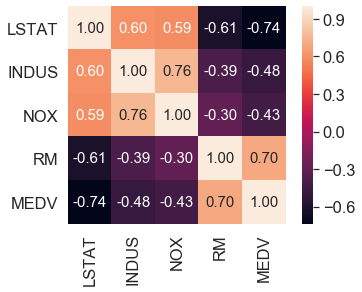

In [6]:
# Let's see the correlation of the variables
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.show()

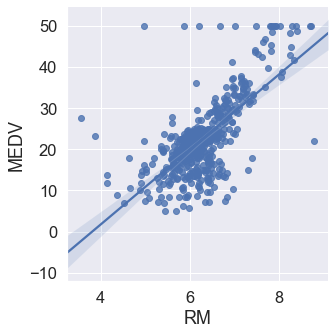

In [7]:
# Let's use a linear plot on 'RM' versus MEDV
sns.lmplot('RM','MEDV',data=df,palette='winter')

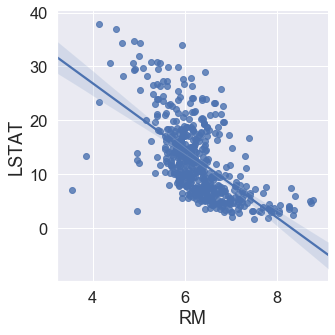

In [8]:
# Let's use a linear plot on 'RM' versus LSTAT
sns.lmplot('RM','LSTAT',data=df,palette='winter')

In [9]:
#Define the label and the data of the dataset
x_data = df.drop(['MEDV'],axis=1)
y_val = df['MEDV']

In [11]:
#Preprocessing
from sklearn.preprocessing import StandardScaler
x_data_sc = StandardScaler().fit_transform(x_data)

In [12]:
#Split the Dataframe (70% train and 30% test )
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data_sc,y_val,test_size=0.3,random_state=101)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(354, 13)
(354,)
(152, 13)
(152,)


In [15]:
#Let's convert from dataframe to numpy
x_train_np = np.array(X_train)
y_train_np = np.array(y_train)
x_test_np = np.array(X_test)
y_test_np = np.array(y_test)

In [16]:
#Let's convert from numpy to tensorflow
train_x, test_x = tf.cast(x_train_np, tf.float32), tf.cast(x_test_np, tf.float32)
train_y, test_y = tf.cast(y_train_np,tf.int64),tf.cast(y_test_np,tf.int64)

In [17]:
#Build the deep learning model
def build_model():
  model = keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=[train_x.shape[1]]),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.Adam(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [18]:
model_tf = build_model()

In [19]:
EPOCHS = 300

history = model_tf.fit(
  train_x, train_y,
  epochs=EPOCHS)

Epoch 1/300
354/354 [==============================] - 0s 1ms/sample - loss: 531.2211 - mae: 21.3162 - mse: 531.2210
Epoch 2/300
354/354 [==============================] - 0s 100us/sample - loss: 495.9217 - mae: 20.5050 - mse: 495.9218
Epoch 3/300
354/354 [==============================] - 0s 97us/sample - loss: 438.1063 - mae: 19.1264 - mse: 438.1063
Epoch 4/300
354/354 [==============================] - 0s 111us/sample - loss: 345.1544 - mae: 16.6427 - mse: 345.1544
Epoch 5/300
354/354 [==============================] - 0s 107us/sample - loss: 217.7222 - mae: 12.7291 - mse: 217.7223
Epoch 6/300
354/354 [==============================] - 0s 111us/sample - loss: 105.7354 - mae: 8.1631 - mse: 105.7354
Epoch 7/300
354/354 [==============================] - 0s 119us/sample - loss: 60.9577 - mae: 5.8300 - mse: 60.9577
Epoch 8/300
354/354 [==============================] - 0s 118us/sample - loss: 47.4461 - mae: 5.0521 - mse: 47.4461
Epoch 9/300
354/354 [==============================] - 0s 

354/354 [==============================] - 0s 112us/sample - loss: 7.7930 - mae: 1.9783 - mse: 7.7930
Epoch 72/300
354/354 [==============================] - 0s 89us/sample - loss: 7.6375 - mae: 1.9851 - mse: 7.6375
Epoch 73/300
354/354 [==============================] - 0s 74us/sample - loss: 7.5785 - mae: 1.9467 - mse: 7.5785
Epoch 74/300
354/354 [==============================] - 0s 79us/sample - loss: 7.4101 - mae: 1.9359 - mse: 7.4101
Epoch 75/300
354/354 [==============================] - 0s 164us/sample - loss: 7.4638 - mae: 1.9414 - mse: 7.4638
Epoch 76/300
354/354 [==============================] - 0s 195us/sample - loss: 7.4070 - mae: 1.9474 - mse: 7.4070
Epoch 77/300
354/354 [==============================] - 0s 108us/sample - loss: 7.7584 - mae: 2.0064 - mse: 7.7584
Epoch 78/300
354/354 [==============================] - 0s 191us/sample - loss: 7.4507 - mae: 1.9490 - mse: 7.4507
Epoch 79/300
354/354 [==============================] - 0s 78us/sample - loss: 7.4085 - mae: 1.9

354/354 [==============================] - 0s 57us/sample - loss: 5.1856 - mae: 1.6376 - mse: 5.1856
Epoch 143/300
354/354 [==============================] - 0s 57us/sample - loss: 5.0504 - mae: 1.5809 - mse: 5.0504
Epoch 144/300
354/354 [==============================] - 0s 56us/sample - loss: 4.9518 - mae: 1.6114 - mse: 4.9518
Epoch 145/300
354/354 [==============================] - 0s 56us/sample - loss: 5.1885 - mae: 1.6605 - mse: 5.1885
Epoch 146/300
354/354 [==============================] - 0s 53us/sample - loss: 5.8394 - mae: 1.7646 - mse: 5.8394
Epoch 147/300
354/354 [==============================] - 0s 58us/sample - loss: 5.2076 - mae: 1.6233 - mse: 5.2076
Epoch 148/300
354/354 [==============================] - 0s 55us/sample - loss: 6.4355 - mae: 1.8507 - mse: 6.4355
Epoch 149/300
354/354 [==============================] - 0s 60us/sample - loss: 4.9929 - mae: 1.5781 - mse: 4.9929
Epoch 150/300
354/354 [==============================] - 0s 58us/sample - loss: 5.0443 - mae: 

354/354 [==============================] - 0s 58us/sample - loss: 3.2714 - mae: 1.2942 - mse: 3.2714
Epoch 213/300
354/354 [==============================] - 0s 53us/sample - loss: 3.2980 - mae: 1.2809 - mse: 3.2980
Epoch 214/300
354/354 [==============================] - 0s 58us/sample - loss: 3.4630 - mae: 1.3460 - mse: 3.4630
Epoch 215/300
354/354 [==============================] - 0s 56us/sample - loss: 3.3357 - mae: 1.3088 - mse: 3.3357
Epoch 216/300
354/354 [==============================] - 0s 52us/sample - loss: 3.7471 - mae: 1.3673 - mse: 3.7471
Epoch 217/300
354/354 [==============================] - 0s 58us/sample - loss: 4.0343 - mae: 1.4678 - mse: 4.0343
Epoch 218/300
354/354 [==============================] - 0s 65us/sample - loss: 4.2496 - mae: 1.4360 - mse: 4.2496
Epoch 219/300
354/354 [==============================] - 0s 57us/sample - loss: 4.0713 - mae: 1.4765 - mse: 4.0713
Epoch 220/300
354/354 [==============================] - 0s 54us/sample - loss: 3.4540 - mae: 

354/354 [==============================] - 0s 56us/sample - loss: 2.3423 - mae: 1.0960 - mse: 2.3423
Epoch 284/300
354/354 [==============================] - 0s 57us/sample - loss: 2.3756 - mae: 1.1007 - mse: 2.3756
Epoch 285/300
354/354 [==============================] - 0s 55us/sample - loss: 2.9477 - mae: 1.2265 - mse: 2.9477
Epoch 286/300
354/354 [==============================] - 0s 57us/sample - loss: 2.2673 - mae: 1.0981 - mse: 2.2673
Epoch 287/300
354/354 [==============================] - 0s 53us/sample - loss: 2.5654 - mae: 1.1602 - mse: 2.5654
Epoch 288/300
354/354 [==============================] - 0s 63us/sample - loss: 3.0083 - mae: 1.2652 - mse: 3.0083
Epoch 289/300
354/354 [==============================] - 0s 57us/sample - loss: 3.2206 - mae: 1.2922 - mse: 3.2206
Epoch 290/300
354/354 [==============================] - 0s 59us/sample - loss: 2.4331 - mae: 1.1324 - mse: 2.4331
Epoch 291/300
354/354 [==============================] - 0s 57us/sample - loss: 2.3708 - mae: 

In [20]:
#deep learning model history
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,epoch
295,2.440890,1.151093,2.440890,295
296,2.635042,1.204072,2.635042,296
297,2.205736,1.069591,2.205736,297
298,2.107047,1.026450,2.107047,298
299,2.414429,1.143753,2.414429,299


In [21]:
#evaluate the model
test_out = model_tf(test_x, training=False)